# **Experiment Notebook (Clustering)**

# **Machine Learning Alogrithms & Applications (36106)**

## Context

Business Use Case: Helping Marketing Team to send customized marketing emails to groups of customers presenting similar spending behaviours (clustering)

### 0. Import Packages

In [1]:
# Importing necessary datasets required for running this experiment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.   Load Dataset

In [3]:
import gdown

# Download the file from Google Drive
url = 'https://drive.google.com/uc?id=1A5U2LQIiJRIkhg2vs92Obgc9-Q0ar6wa'
output = 'final_transaction_data.csv'
gdown.download(url, output, quiet=False)

# Read the CSV file using pandas
transactions = pd.read_csv(output)

# Now you can work with the data as needed
transactions.head()  # Display the first few rows of the dataframe

Downloading...
From (original): https://drive.google.com/uc?id=1A5U2LQIiJRIkhg2vs92Obgc9-Q0ar6wa
From (redirected): https://drive.google.com/uc?id=1A5U2LQIiJRIkhg2vs92Obgc9-Q0ar6wa&confirm=t&uuid=2172482b-b567-41ce-91f1-4652515dd96d
To: /content/final_transaction_data.csv
100%|██████████| 566M/566M [00:06<00:00, 91.7MB/s]
<ipython-input-3-5b513570914e>:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv(output)


,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,"merch_long,"
0,4841962332605860,3005591724,0a9c8afdc2ca6b4bce8ecc2be7d2e935,1595972601,shopping_pos,75.51,0,Warren-Nelson,40.571481,-77.148282,NaN
1,4841962332605860,3005591724,e336c0796eb5df533b742430e8232faf,1609268401,entertainment,76.15,0,Boone-Cruz,40.978736,-76.871023,NaN
2,4841962332605860,3005591724,e0f09f622f8e154b1e93ae42ed8b0a46,1589568716,shopping_net,78.83,0,Nguyen-Moore,39.861767,-76.008964,NaN
3,4841962332605860,3005591724,ed2091c4c6c27c2d3d6a1bf1b998f9d5,1556754723,gas_transport,75.85,0,Hood Inc,39.836262,-76.962103,NaN
4,4841962332605860,3005591724,10817e38ab04f577f9af4c4aa52762a6,1614554682,entertainment,66.32,0,"Hurst, Ramirez and Cohen",40.780294,-75.876983,NaN


In [4]:
url1 = 'https://drive.google.com/uc?id=1uuV99fSt5xm49_q2qLnw3Q0EtPL-12-x'
output1 = 'customers.csv'
gdown.download(url1, output1, quiet=False)

# Read the CSV file using pandas
customers = pd.read_csv(output1, delimiter='|')

# Now you can work with the data as needed
customers.head()  # Display the first few rows of the dataframe

Downloading...
From: https://drive.google.com/uc?id=1uuV99fSt5xm49_q2qLnw3Q0EtPL-12-x
To: /content/customers.csv
100%|██████████| 156k/156k [00:00<00:00, 50.6MB/s]


,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225


In [5]:
# Merge the dataframes on the 'acct_num' and 'cc_num' columns using inner join
merged_data = pd.merge(transactions, customers, on=['acct_num', 'cc_num'], how='inner')

### 2. Explore Dataset

In [6]:
# Display the first few rows of the merged dataframe
merged_data.head(5)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,4841962332605860,3005591724,0a9c8afdc2ca6b4bce8ecc2be7d2e935,1595972601,shopping_pos,75.51,0,Warren-Nelson,40.571481,-77.148282,...,F,6748 Corey Mills,Lancaster,PA,17601,40.0766,-76.3107,164596,"Engineer, automotive",1946-05-23
1,4841962332605860,3005591724,e336c0796eb5df533b742430e8232faf,1609268401,entertainment,76.15,0,Boone-Cruz,40.978736,-76.871023,...,F,6748 Corey Mills,Lancaster,PA,17601,40.0766,-76.3107,164596,"Engineer, automotive",1946-05-23
2,4841962332605860,3005591724,e0f09f622f8e154b1e93ae42ed8b0a46,1589568716,shopping_net,78.83,0,Nguyen-Moore,39.861767,-76.008964,...,F,6748 Corey Mills,Lancaster,PA,17601,40.0766,-76.3107,164596,"Engineer, automotive",1946-05-23
3,4841962332605860,3005591724,ed2091c4c6c27c2d3d6a1bf1b998f9d5,1556754723,gas_transport,75.85,0,Hood Inc,39.836262,-76.962103,...,F,6748 Corey Mills,Lancaster,PA,17601,40.0766,-76.3107,164596,"Engineer, automotive",1946-05-23
4,4841962332605860,3005591724,10817e38ab04f577f9af4c4aa52762a6,1614554682,entertainment,66.32,0,"Hurst, Ramirez and Cohen",40.780294,-75.876983,...,F,6748 Corey Mills,Lancaster,PA,17601,40.0766,-76.3107,164596,"Engineer, automotive",1946-05-23


In [7]:
# Display the last few rows of the merged dataframe
merged_data.tail(5)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
4260899,2700038146342927,322496879500,8437c4b02a66d85712ea7e9b3f097e58,1670216130,kids_pets,2.74,0,"Lee, Alvarez and Montoya",33.309133,-96.483218,...,M,730 Glenn Passage Suite 273,Celina,TX,75009,33.3103,-96.7673,8785,Hotel manager,1964-08-01
4260900,2700038146342927,322496879500,6210299115799914ec38c8127501a2cc,1661681751,food_dining,1.16,0,"Gordon, Wise and Pearson",34.134261,-97.564825,...,M,730 Glenn Passage Suite 273,Celina,TX,75009,33.3103,-96.7673,8785,Hotel manager,1964-08-01
4260901,2700038146342927,322496879500,3b4d59789fda0153457f680094765526,1664282234,home,1.51,0,"Fitzgerald, Hendrix and Taylor",34.090086,-97.151335,...,M,730 Glenn Passage Suite 273,Celina,TX,75009,33.3103,-96.7673,8785,Hotel manager,1964-08-01
4260902,2700038146342927,322496879500,6839dfa3a900069908fd397c8ed7c4d5,1671883998,travel,3.38,0,Lowe Ltd,33.333248,-96.301791,...,M,730 Glenn Passage Suite 273,Celina,TX,75009,33.3103,-96.7673,8785,Hotel manager,1964-08-01
4260903,2700038146342927,322496879500,fb6f2c413865e80b3531738c60f7cb2c,1671875463,travel,3.52,0,"Foster, Campos and Watts",33.793337,-96.720906,...,M,730 Glenn Passage Suite 273,Celina,TX,75009,33.3103,-96.7673,8785,Hotel manager,1964-08-01


In [8]:
# Describing the shape of the dataset
merged_data.shape

(4260904, 24)

In [9]:
# Get a concise summary of the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 24 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cc_num       int64  
 1   acct_num     int64  
 2   trans_num    object 
 3   unix_time    int64  
 4   category     object 
 5   amt          float64
 6   is_fraud     int64  
 7   merchant     object 
 8   merch_lat    float64
 9   merch_long   float64
 10  merch_long,  object 
 11  ssn          object 
 12  first        object 
 13  last         object 
 14  gender       object 
 15  street       object 
 16  city         object 
 17  state        object 
 18  zip          int64  
 19  lat          float64
 20  long         float64
 21  city_pop     int64  
 22  job          object 
 23  dob          object 
dtypes: float64(5), int64(6), object(13)
memory usage: 780.2+ MB


### 3. Explore Target variable

In this, we will not be exploring target variable since its clustering task and this task is a type of unsupervised learning.

I've chosen clustering over exploring a target variable because it allows for a comprehensive understanding of customer spending behaviors, enabling the creation of customized marketing emails tailored to distinct segments. This approach offers actionable insights for the marketing team without relying on predefined labels, fostering flexibility and adaptability in strategy optimization

### 4. Explore Variables of Interest

In [16]:
# Convert the 'unix_time' column to datetime
merged_data['datetime'] = pd.to_datetime(merged_data['unix_time'], unit='s')

# Print the first few rows to verify the conversion
print(merged_data[['unix_time', 'datetime']].head())

# Display the first few rows to see the extracted components
merged_data.head()

# Optionally, drop the original 'unix_time' column if it's no longer needed
merged_data = merged_data.drop(columns=['unix_time'])

    unix_time            datetime
0  1595972601 2020-07-28 21:43:21
1  1609268401 2020-12-29 19:00:01
2  1589568716 2020-05-15 18:51:56
3  1556754723 2019-05-01 23:52:03
4  1614554682 2021-02-28 23:24:42


In [17]:
# Ensure the 'datetime' column is in datetime format
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])

# Filter the data to include only fraudulent transactions
fraud_data = merged_data[merged_data['is_fraud'] == 1]

# Group by year to count the number of fraudulent transactions per year
fraud_yearly = fraud_data.groupby(fraud_data['datetime'].dt.year).size().reset_index(name='count')

# Print the count of fraudulent transactions per year
print(fraud_yearly)

   datetime  count
0      2019    824
1      2020    610
2      2021    504
3      2022   3096


In [18]:
# Group by day to count the number of fraudulent transactions per day
fraud_daily = fraud_data.groupby(fraud_data['datetime'].dt.date).size().reset_index(name='count')

# Group by hour to count the number of fraudulent transactions per hour
fraud_hourly = fraud_data.groupby(fraud_data['datetime'].dt.hour).size().reset_index(name='count')

# Print the count of fraudulent transactions per day and hour
print("Fraudulent transactions per day:")
print(fraud_daily)
print("\nFraudulent transactions per hour:")
print(fraud_hourly)

Fraudulent transactions per day:
       datetime  count
0    2019-01-06      2
1    2019-01-07      2
2    2019-01-08      5
3    2019-01-14      4
4    2019-01-16     15
..          ...    ...
724  2022-12-21      4
725  2022-12-22      2
726  2022-12-23     12
727  2022-12-24     10
728  2022-12-25      4

[729 rows x 2 columns]

Fraudulent transactions per hour:
    datetime  count
0          0     39
1          1     41
2          2     48
3          3     48
4          4     43
5          5     54
6          6     53
7          7     44
8          8     61
9          9     53
10        10     45
11        11    576
12        12   1172
13        13    856
14        14    486
15        15    466
16        16    471
17        17    246
18        18     32
19        19     44
20        20     37
21        21     38
22        22     42
23        23     39


In [19]:
# Extract the day of the week component from the datetime column
merged_data['day_of_week'] = merged_data['datetime'].dt.dayofweek

# Group by day of the week to count the number of transactions for each day
transactions_per_day_of_week = merged_data.groupby('day_of_week').size().reset_index(name='count')

# Print the count of transactions for each day of the week
print("Transactions on each day of the week:")
print(transactions_per_day_of_week)

Transactions on each day of the week:
   day_of_week   count
0            0  407115
1            1  458629
2            2  493754
3            3  577518
4            4  777861
5            5  870871
6            6  675156


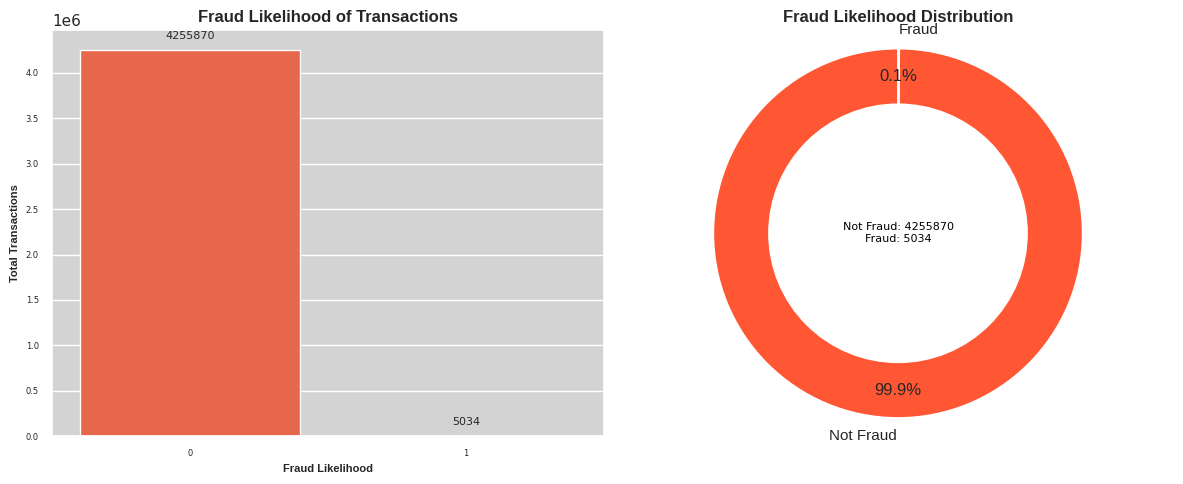

In [14]:
# Assuming merged_data is already defined and loaded

# Define custom colors
palette_features = ['#FF5733', '#006666']

# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot countplot on the first subplot
sns.countplot(data=merged_data, x='is_fraud', palette=palette_features, hue='is_fraud', ax=axes[0], legend=False)
axes[0].set_title('Fraud Likelihood of Transactions', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
axes[0].set_xlabel('Fraud Likelihood', fontsize=8, fontweight='bold', fontname='Liberation Sans')
axes[0].set_ylabel('Total Transactions', fontsize=8, fontweight='bold', fontname='Liberation Sans')
axes[0].tick_params(axis='both', labelsize=6)

# Add labels to the bars
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=8)  # Adjust label font size

# Plot pie chart on the second subplot
fraud_counts = merged_data['is_fraud'].value_counts()
fraud_distribution = merged_data['is_fraud'].value_counts(normalize=True) * 100

axes[1].pie(fraud_distribution, labels=fraud_distribution.index.map({0: 'Not Fraud', 1: 'Fraud'}),
            autopct='%1.1f%%', colors=palette_features, pctdistance=0.85, startangle=90,
            textprops={'fontname': 'Liberation Sans'})  # Set fontname for labels in pie chart

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
total_counts = f"Not Fraud: {fraud_counts[0]}\nFraud: {fraud_counts[1]}"
axes[1].text(x=0, y=0, s=total_counts, horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')  # Adjust text font size
axes[1].axis('equal')
axes[1].set_title('Fraud Likelihood Distribution', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

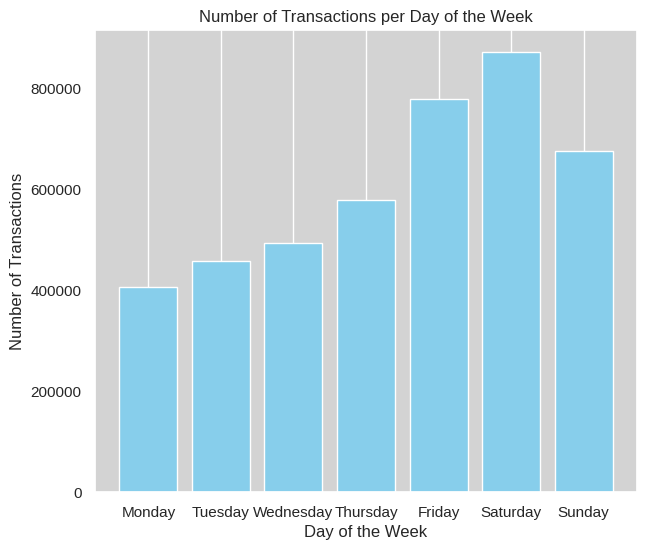

In [15]:
# Set font to Liberation Sans
plt.rcParams['font.family'] = 'Liberation Sans'

# Define the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(7, 6))
plt.bar(transactions_per_day_of_week['day_of_week'], transactions_per_day_of_week['count'], color='skyblue')

# Customize the plot
plt.title('Number of Transactions per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(transactions_per_day_of_week['day_of_week'], days)
plt.grid(axis='y')

# Show plot
plt.show()

**Observation from chart**

From the following bar plot, we can observe that most of customers usually made transactions during Friday and weekend i.e Saturday & Sunday while they usually made lower transaction on first day of week (Monday).

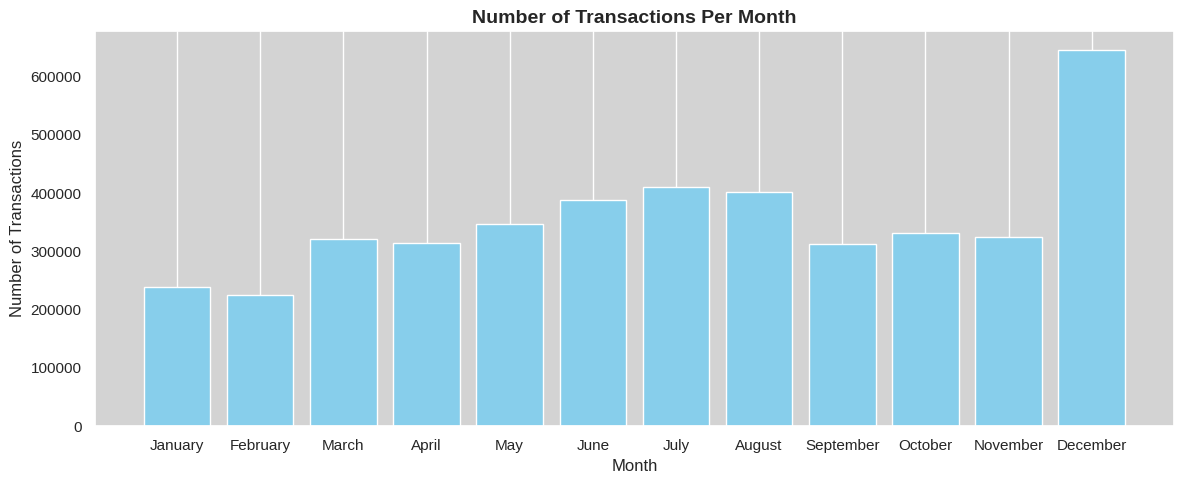

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'datetime' column is present in your merged_data DataFrame
# Convert 'datetime' column to datetime type if not already
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])

# Add a new column for months
merged_data['month'] = merged_data['datetime'].dt.month

# Define the months of the year
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by month to count the number of transactions for each month
transactions_per_month = merged_data.groupby('month').size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 5))
plt.bar(transactions_per_month['month'], transactions_per_month['count'], color='skyblue')

# Customize the plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Number of Transactions Per Month', fontweight='bold', fontsize=14)
plt.xticks(range(1, 13), months)  # Set x-axis ticks to show all months
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Observation from chart**

From the following bar plot, we can observe that most of customers usually made most of transactions during the month of December. The significant increase in transactions during December suggests heightened consumer spending, likely driven by holiday shopping and end-of-year festivities.

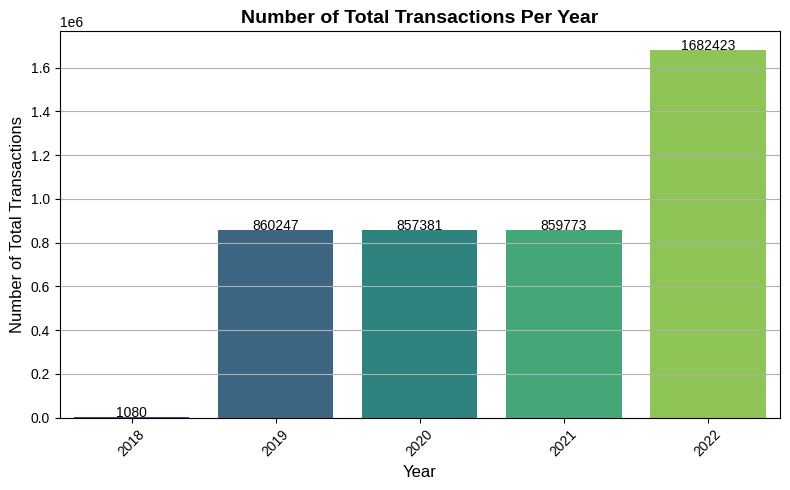

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'datetime' column is present in your merged_data DataFrame
# Convert 'datetime' column to datetime type if not already
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])

# Add a new column for the year
merged_data['year'] = merged_data['datetime'].dt.year

# Group by year to count the total transactions per year
total_yearly = merged_data.groupby('year').size().reset_index(name='count')

# Set font to Liberation Sans
plt.rcParams['font.family'] = 'Liberation Sans'

# Plot the count of total transactions per year
plt.figure(figsize=(8, 5))  # Decrease the figure size slightly
sns.barplot(data=total_yearly, x='year', y='count', palette='viridis')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Total Transactions', fontsize=12)
plt.title('Number of Total Transactions Per Year', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)

# Show labels on each bar
for index, row in total_yearly.iterrows():
    plt.text(index, row['count'], str(row['count']), color='black', ha="center")

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Observation from chart**

The above plot indicates that the majority of transactions occurred in the year 2022, whereas the year 2018 experienced comparatively lower transaction volumes. This trend suggests a potential increase in activity over time, possibly influenced by economic factors or shifts in consumer behavior.

In [21]:
# Ensure the 'dob' column is in datetime format
merged_data['dob'] = pd.to_datetime(merged_data['dob'])

# Calculate the age based on the current date
current_date = pd.to_datetime('today')

# Calculate age
merged_data['age'] = merged_data['dob'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Print the first few rows to verify the age calculation
merged_data[['dob', 'age']].head()

,dob,age
0,1946-05-23,78
1,1946-05-23,78
2,1946-05-23,78
3,1946-05-23,78
4,1946-05-23,78


In [22]:
# Calculate age
merged_data['age'] = merged_data['dob'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Define age bands
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

# Create age bands
merged_data['age_band'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

# Print the first few rows to verify the age band creation
merged_data[['dob', 'age', 'age_band']].head()

,dob,age,age_band
0,1946-05-23,78,75-84
1,1946-05-23,78,75-84
2,1946-05-23,78,75-84
3,1946-05-23,78,75-84
4,1946-05-23,78,75-84


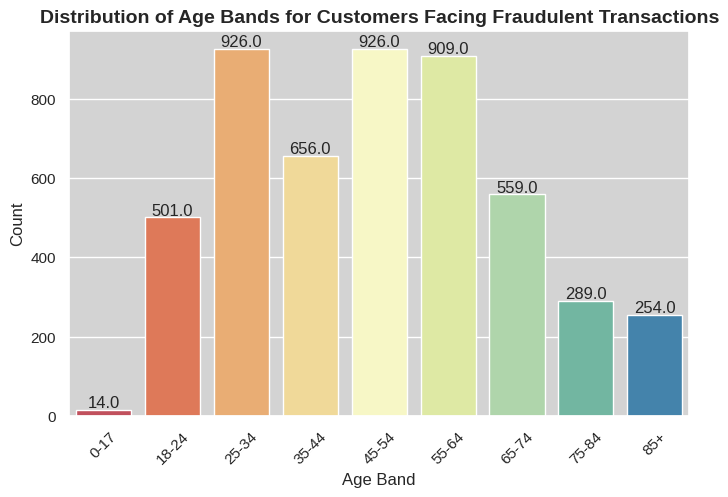

In [19]:
# Filter the data to include only customers who faced fraudulent transactions
fraud_data = merged_data[merged_data['is_fraud'] == 1]

# Visualize the age bands of customers who faced fraudulent transactions
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=fraud_data, x='age_band', palette="Spectral")
plt.xlabel('Age Band', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Age Bands for Customers Facing Fraudulent Transactions', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Observation from chart**

From the following chart, we can observe that customers aged around 25-34 & 45-54 and also 55-64 faced fraud over their transactions.This observation suggests that individuals aged between 25-34, 45-54, and 55-64 are disproportionately experiencing fraudulent transactions, potentially indicating targeted fraud or common vulnerabilities within those age groups.

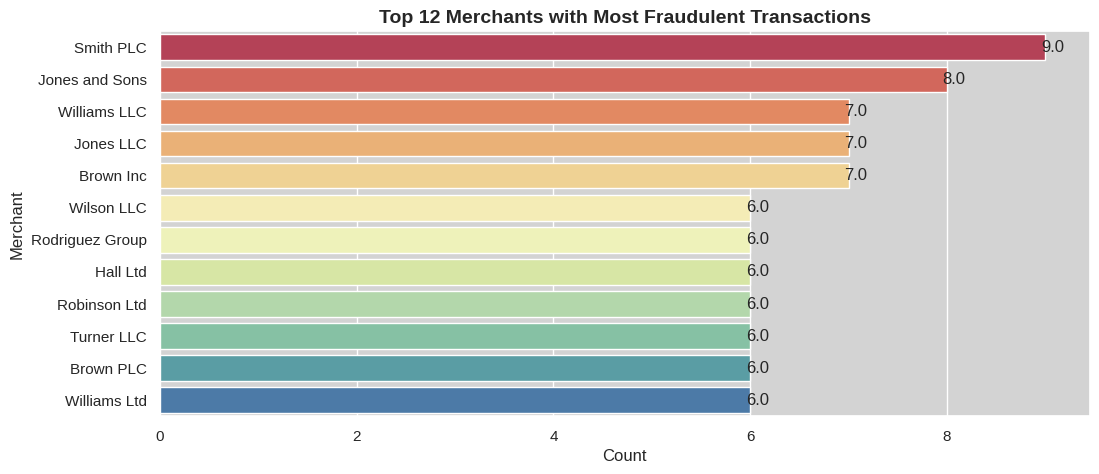

In [21]:
# Filter the data to include only fraudulent transactions
fraud_data = merged_data[merged_data['is_fraud'] == 1]

# Get the top 12 merchants with the most fraudulent transactions
top_merchants = fraud_data['merchant'].value_counts().head(12).index

# Filter the fraud data to include only these top 12 merchants
top_merchant_data = fraud_data[fraud_data['merchant'].isin(top_merchants)]

# Visualize the top 12 merchants with the most fraudulent transactions
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=top_merchant_data, y='merchant', order=top_merchants, palette="Spectral")
plt.xlabel('Count', fontsize=12)
plt.ylabel('Merchant', fontsize=12)
plt.title('Top 12 Merchants with Most Fraudulent Transactions', fontweight='bold', fontsize=14)

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

**Observation from Chart**

This list presents the top 12 merchants where customers encountered fraudulent transactions, likely indicating areas of heightened risk or vulnerabilities within those specific businesses.The counter plot reveals that Smith PLC experienced 9 fraudulent transactions, with Jones & Sons following closely with 8 fraudulent transactions, indicating significant instances of fraud targeting these specific merchants.

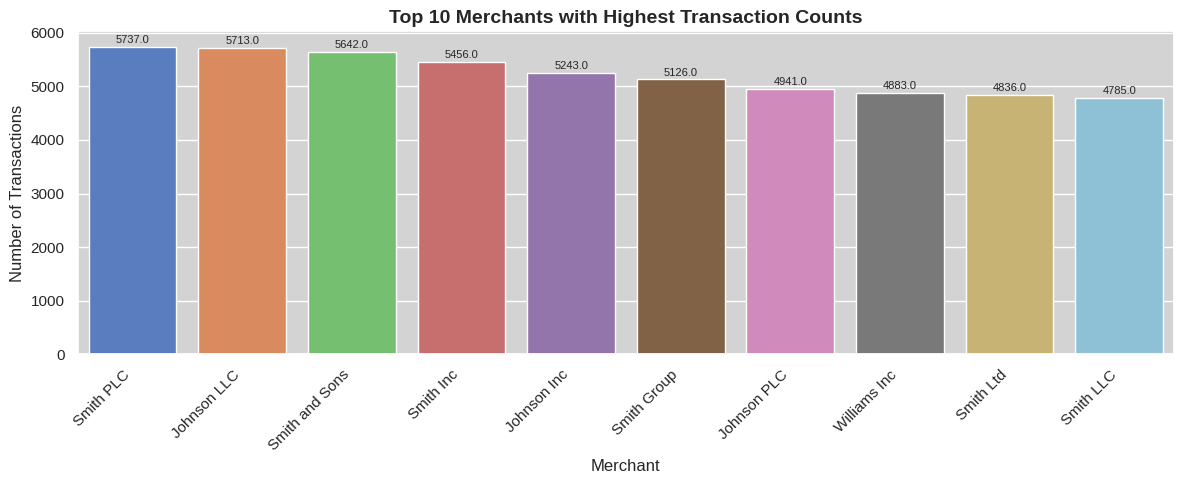

In [22]:
# Group by 'merchant' to count the number of transactions for each merchant
transactions_per_merchant = merged_data.groupby('merchant').size().reset_index(name='count')

# Sort the dataframe by count in descending order to focus on top transactions
transactions_per_merchant = transactions_per_merchant.sort_values(by='count', ascending=False)

# Plot the top N merchants with the highest transaction counts
top_n = 10  # Change this value to visualize more or fewer merchants
plt.figure(figsize=(12,5))
ax = sns.barplot(x='merchant', y='count', data=transactions_per_merchant.head(top_n), palette='muted')
plt.xlabel('Merchant', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title(f'Top {top_n} Merchants with Highest Transaction Counts', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add labels on each bar with a smaller font size
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=8)  # Smaller font size

plt.tight_layout()
plt.show()

**Observation from chart**

The counter plot illustrates that most customers interacted with Smith PLC, totaling around 5737 transactions, closely followed by Johnson LLC with 5713 transactions, suggesting high engagement levels with these merchants.

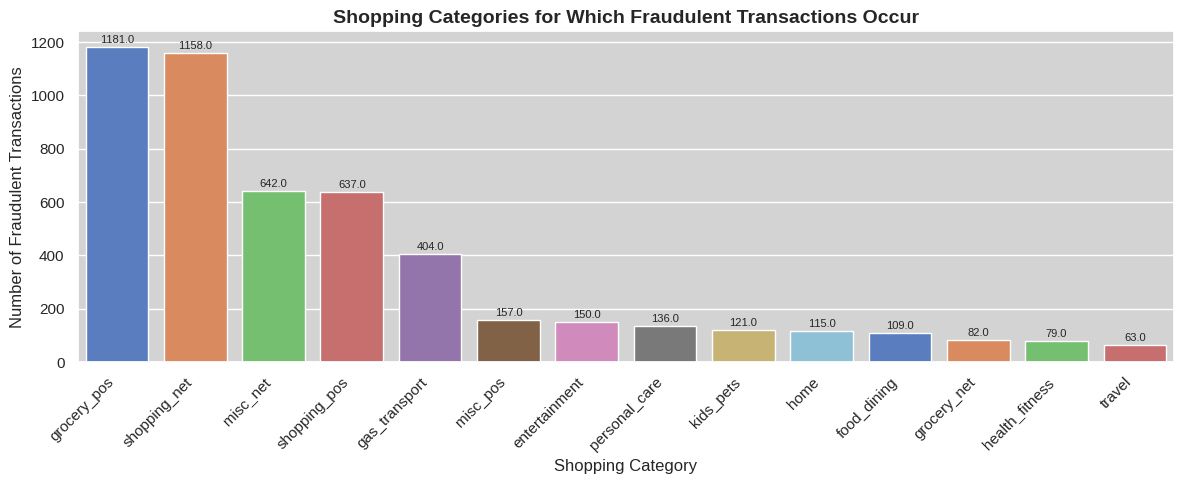

In [23]:
# Filter the data to include only fraudulent transactions
fraudulent_transactions = merged_data[merged_data['is_fraud'] == 1]

# Count the number of fraudulent transactions for each shopping category
fraudulent_category_counts = fraudulent_transactions['category'].value_counts()

# Plot the shopping categories for which fraudulent transactions occur
plt.figure(figsize=(12,5))
ax = sns.barplot(x=fraudulent_category_counts.index, y=fraudulent_category_counts.values, palette='muted')
plt.xlabel('Shopping Category', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Shopping Categories for Which Fraudulent Transactions Occur', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=8)  # Smaller font size

plt.tight_layout()
plt.show()

**Observation from chart**

The counter plot indicates that a significant portion of fraudulent transactions occurred during grocery purchases via POS (Point of Sale) systems, with online shopping emerging as another prominent factor contributing to fraudulent transactions, highlighting potential vulnerabilities in both these payment methods.

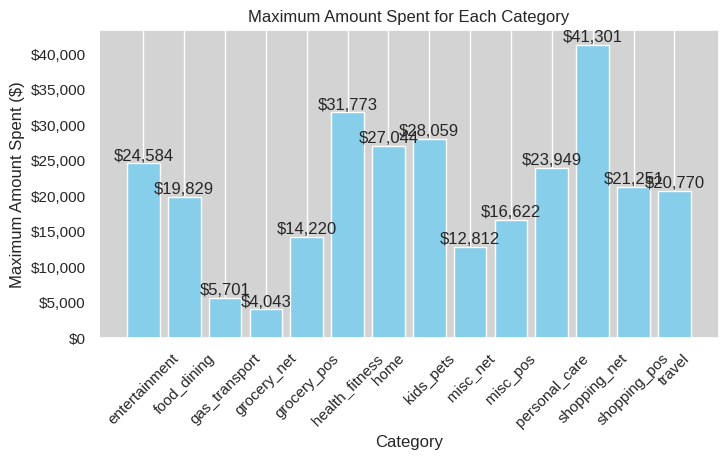

In [24]:
# Group by category and find the maximum amount spent in each category
max_amt_per_category = merged_data.groupby('category')['amt'].max().reset_index()

# Plot the maximum amount spent for each category
plt.figure(figsize=(8, 4))
bars = plt.bar(max_amt_per_category['category'], max_amt_per_category['amt'], color='skyblue')

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '${:,.0f}'.format(yval), va='bottom', ha='center')

# Customize the plot
plt.title('Maximum Amount Spent for Each Category')
plt.xlabel('Category')
plt.ylabel('Maximum Amount Spent ($)')
plt.xticks(rotation=45)

# Add dollar signs to the y-axis labels
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)

plt.grid(axis='y')

# Show plot
plt.show()

**Observation from chart**

The plot shows that the highest expenditure by customers was in the online shopping category, followed by transactions related to health and fitness, suggesting significant spending patterns in these sectors.

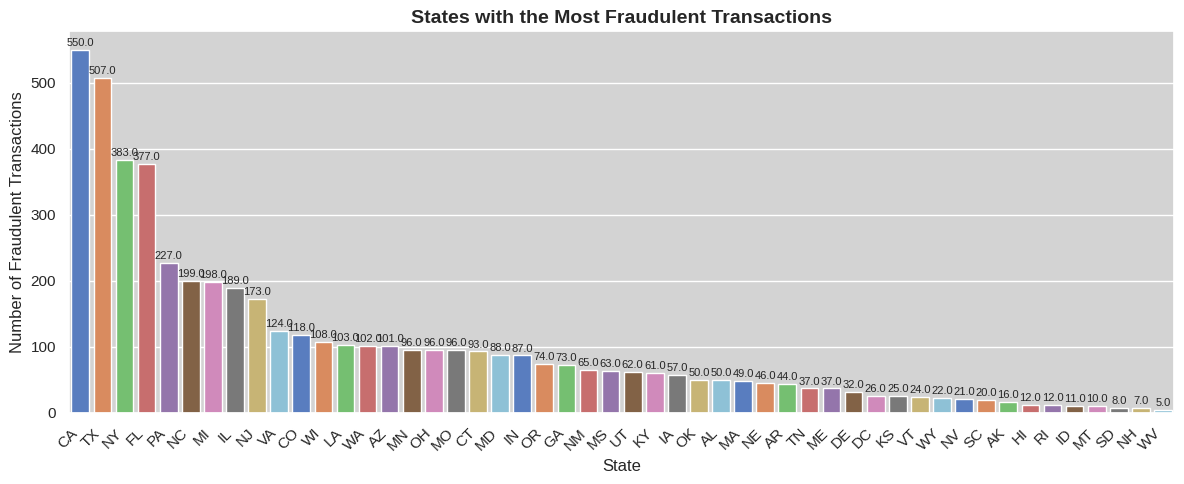

In [25]:
# Filter the data to include only fraudulent transactions
fraudulent_transactions = merged_data[merged_data['is_fraud'] == 1]

# Count the number of fraudulent transactions in each state
fraudulent_state_counts = fraudulent_transactions['state'].value_counts()

# Plot the states where the number of fraudulent transactions occurs most
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=fraudulent_state_counts.index, y=fraudulent_state_counts.values, palette='muted')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('States with the Most Fraudulent Transactions', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=8)  # Smaller font size

plt.tight_layout()
plt.show()

**Observation from chart**

The plot clearly shows that most customers in California experienced fraudulent transactions, followed by those in Texas & in other states as well.

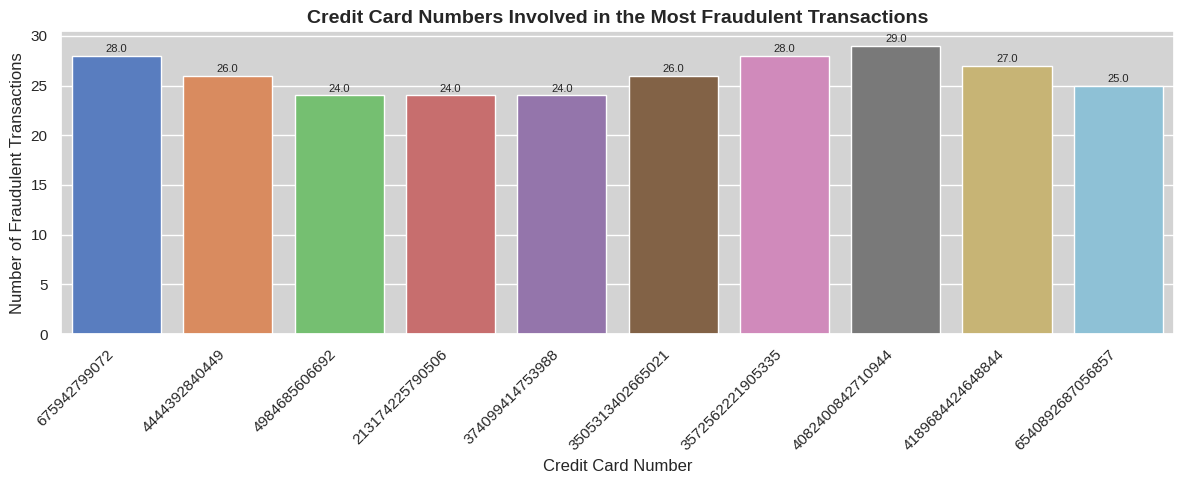

In [26]:
# Filter the data to include only fraudulent transactions
fraudulent_transactions = merged_data[merged_data['is_fraud'] == 1]

# Count the number of fraudulent transactions for each credit card number
fraudulent_cc_counts = fraudulent_transactions['cc_num'].value_counts()

# Plot the credit card numbers involved in fraudulent transactions
plt.figure(figsize=(12,5))
ax = sns.barplot(x=fraudulent_cc_counts.index[:10], y=fraudulent_cc_counts.values[:10], palette='muted')
plt.xlabel('Credit Card Number', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Credit Card Numbers Involved in the Most Fraudulent Transactions', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add labels on each bar with a smaller font size
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=8)  # Smaller font size

plt.tight_layout()
plt.show()

**Observation from chart**

The counter plot reveals that credit card numbers '6759-4279-9072', '4082-4008-4271-0944', and '3572-5622-2190-5335' were frequently used by customers and were involved in fraudulent transactions.

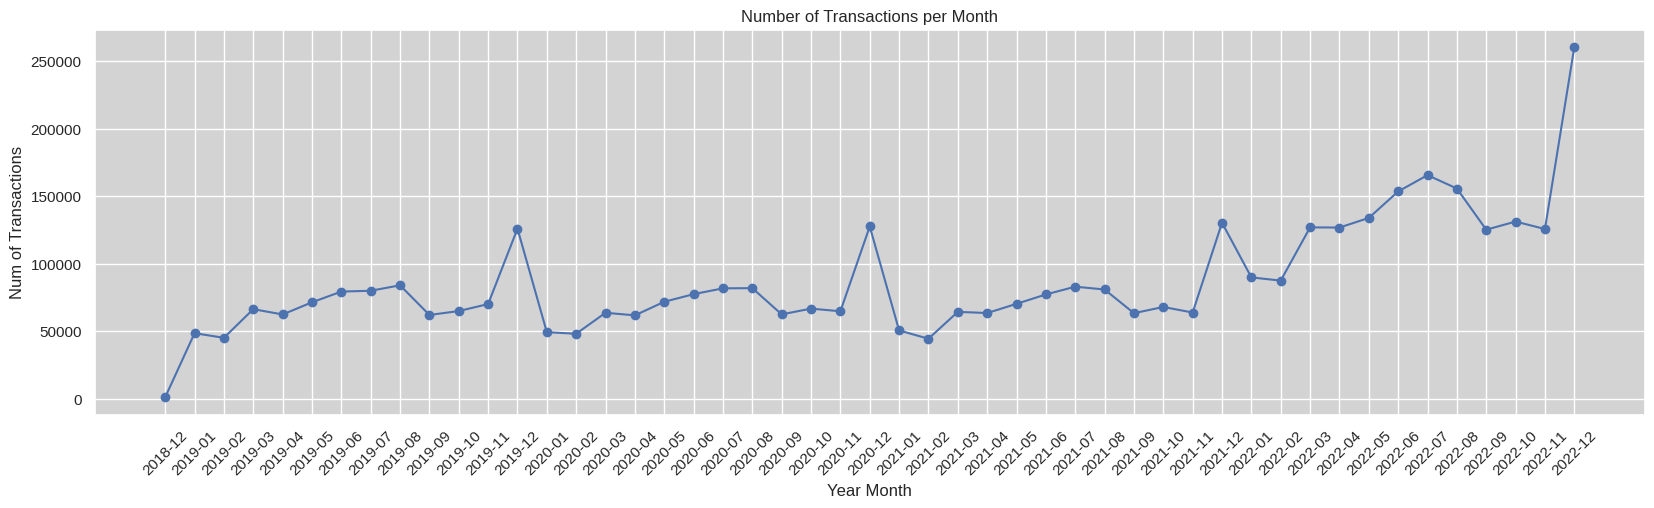

In [41]:
# Convert 'datetime' to datetime format if it's not already
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])

# Group by month and count the number of transactions
monthly_transactions = merged_data.groupby(merged_data['datetime'].dt.to_period('M')).size().reset_index(name='num_of_transactions')

# Create x-axis values
x = np.arange(0, len(monthly_transactions), 1)

# Plot the time series with markers
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(x, monthly_transactions['num_of_transactions'], marker='o', linestyle='-')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(monthly_transactions['datetime'].astype(str), rotation=45)
ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.title('Number of Transactions per Month')

plt.show()

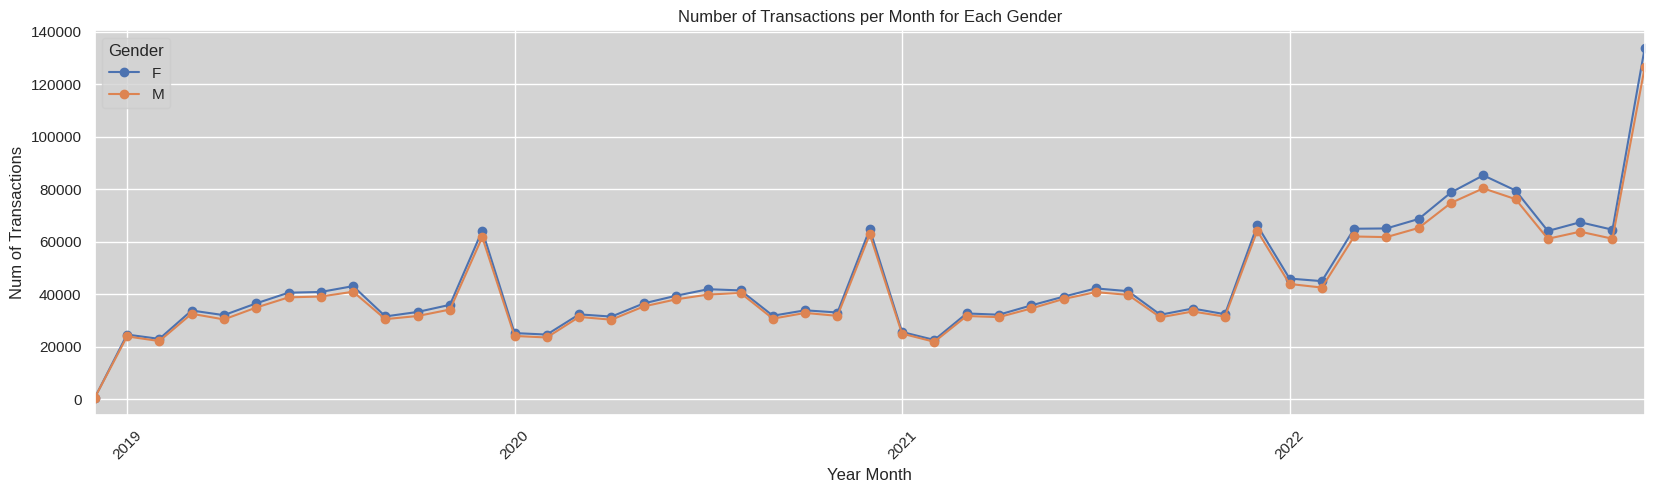

In [42]:
# Convert 'datetime' to datetime format if it's not already
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])

# Group by gender and month, then count the number of transactions
monthly_transactions_gender = merged_data.groupby([merged_data['datetime'].dt.to_period('M'), 'gender']).size().unstack(fill_value=0)

# Plot the time series for both genders on the same plot
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
monthly_transactions_gender.plot(ax=ax, marker='o', linestyle='-')

# Customize the plot
ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.title('Number of Transactions per Month for Each Gender')
plt.xticks(rotation=45)

plt.legend(title='Gender')

plt.show()

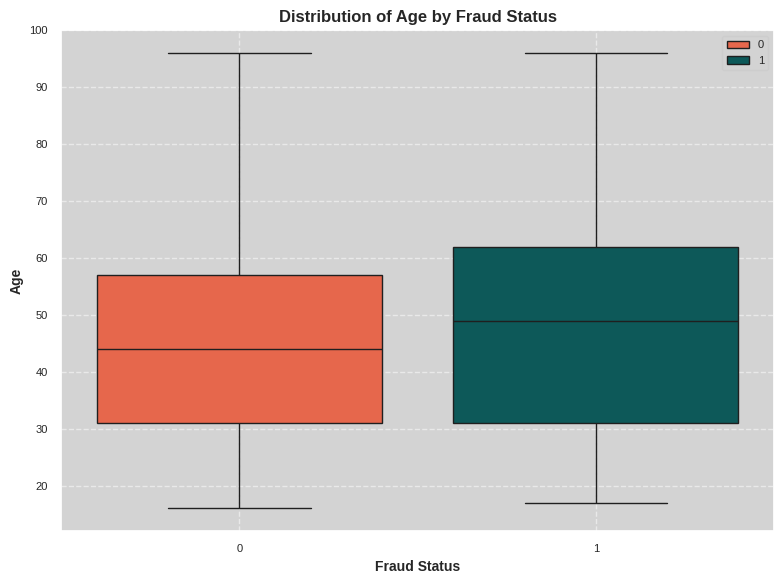

In [29]:
# Set custom color palette
colors = ['#FF5733', '#006666']

# Create a figure and axis objects
plt.figure(figsize=(8, 6))

# Create box plot for age
sns.boxplot(data=merged_data, x='is_fraud', y='age', hue='is_fraud', palette=colors, dodge=False)
plt.title('Distribution of Age by Fraud Status', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Fraud Status', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')
plt.ylabel('Age', fontsize=10, fontname='Liberation Sans', fontweight='bold')
plt.xticks(fontsize=8, fontname='Liberation Sans')
plt.yticks(fontsize=8, fontname='Liberation Sans')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title=None, loc='best', fontsize=8)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 5. Prepare Data

In [8]:
df_cleaned = merged_data.copy()

Missing Values:
merch_long           9
merch_long,    4260895
dtype: int64


<Figure size 800x400 with 0 Axes>

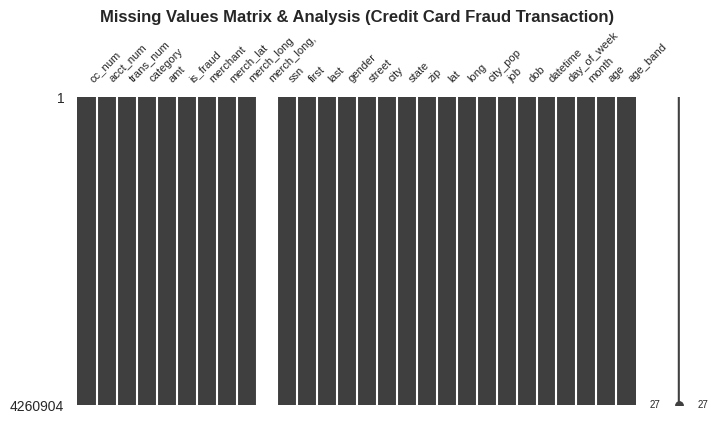

In [21]:
# Checking for nay missing values in the dataset

import missingno as msno

def check_missing_values(merged_data):
    # Check for missing values
    missing_values = merged_data.isnull().sum()

    # Filter out columns with missing values
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("No missing values found!")
    else:
        print("Missing Values:")
        print(missing_values)

        # Visualize missing values using missingno
        plt.figure(figsize=(8, 4))  # Adjust the plot size
        msno.matrix(merged_data, figsize=(8, 4), fontsize=8)  # Set the font size
        plt.title('Missing Values Matrix & Analysis (Credit Card Fraud Transaction)', fontsize=12, fontname='Liberation Sans', fontweight='bold')
        plt.xticks(fontname='Liberation Sans')  # Set x-axis font to Liberation Sans
        plt.yticks(fontname='Liberation Sans')  # Set y-axis font to Liberation Sans
        plt.show()

# Call the function with your DataFrame
check_missing_values(df_cleaned)

In [9]:
# Check initial state of the columns
print("Initial missing values:")
print(merged_data[['merch_long', 'merch_long,']].isnull().sum())

Initial missing values:
merch_long           9
merch_long,    4260895
dtype: int64


In [10]:
# Fill missing values in 'merch_long' with values from 'merch_long,' if they exist
merged_data['merch_long'] = merged_data['merch_long'].fillna(merged_data['merch_long,'])

In [11]:
# Verify the missing values after the operation
print("After filling missing values:")
print(merged_data[['merch_long', 'merch_long,']].isnull().sum())

After filling missing values:
merch_long           0
merch_long,    4260895
dtype: int64


In [12]:
# Optionally, drop the 'merch_long,' column if it's no longer needed
merged_data = merged_data.drop(columns=['merch_long,'])

In [13]:
# Assuming 'merged_data' is your dataframe

# Check for duplicate rows
duplicates = merged_data.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the duplicate rows (if any)
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(merged_data[duplicates])

# If you want to remove the duplicate rows, use the drop_duplicates method
merged_data = merged_data.drop_duplicates()

# Verify that duplicates have been removed
print(f"Number of duplicate rows after removal: {merged_data.duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [14]:
# Assuming df_cleaned is your DataFrame with the column 'merch_long'
# Removing the trailing comma from values in the 'merch_long' column
merged_data['merch_long'] = merged_data['merch_long'].str.rstrip(',')

# Converting 'merch_long' to float type
merged_data['merch_long'] = merged_data['merch_long'].astype(float)

In [23]:
# Extract hour from 'datetime' column
merged_data['transaction_hour'] = merged_data['datetime'].dt.hour

In [24]:
df_cleaned = merged_data.copy()

In [25]:
def get_column_lists(df_cleaned):
    # List of categorical columns for one-hot encoding
    categorical_columns = [col for col in df_cleaned.columns if df_cleaned.dtypes[col] == 'object']

    # List of numerical columns to standardized data
    numerical_columns = [col for col in df_cleaned.columns if df_cleaned.dtypes[col] != 'object']

    return numerical_columns, categorical_columns

# Call the function with your DataFrame
numerical_cols, categorical_cols = get_column_lists(df_cleaned)

print('Numerical Features are:', numerical_cols)
print('Categorical Features are:', categorical_cols)

Numerical Features are: ['cc_num', 'acct_num', 'amt', 'is_fraud', 'merch_lat', 'merch_long', 'zip', 'lat', 'long', 'city_pop', 'dob', 'datetime', 'day_of_week', 'year', 'age', 'age_band', 'transaction_hour']
Categorical Features are: ['trans_num', 'category', 'merchant', 'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']


In [26]:
# Removing irrelevant columns from the dataset

def drop_columns(df_cleaned, columns_to_drop):
    df_cleaned.drop(columns_to_drop, axis=1, inplace=True)
    return df_cleaned

columns_to_drop = ['cc_num','acct_num','dob', 'datetime','merchant','ssn', 'first', 'last','street', 'city','job','trans_num','merch_lat', 'merch_long']

df_cleaned = drop_columns(df_cleaned, columns_to_drop)

In [27]:
df_cleaned

,category,amt,is_fraud,gender,state,zip,lat,long,city_pop,day_of_week,year,age,age_band,transaction_hour
0,shopping_pos,75.51,0,F,PA,17601,40.0766,-76.3107,164596,1,2020,78,75-84,21
1,entertainment,76.15,0,F,PA,17601,40.0766,-76.3107,164596,1,2020,78,75-84,19
2,shopping_net,78.83,0,F,PA,17601,40.0766,-76.3107,164596,4,2020,78,75-84,18
3,gas_transport,75.85,0,F,PA,17601,40.0766,-76.3107,164596,2,2019,78,75-84,23
4,entertainment,66.32,0,F,PA,17601,40.0766,-76.3107,164596,6,2021,78,75-84,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,kids_pets,2.74,0,M,TX,75009,33.3103,-96.7673,8785,0,2022,59,55-64,4
4260900,food_dining,1.16,0,M,TX,75009,33.3103,-96.7673,8785,6,2022,59,55-64,10
4260901,home,1.51,0,M,TX,75009,33.3103,-96.7673,8785,1,2022,59,55-64,12
4260902,travel,3.38,0,M,TX,75009,33.3103,-96.7673,8785,5,2022,59,55-64,12


In [28]:
df = df_cleaned

In [29]:
customer_data = df.copy()

In [30]:
# Remove the 'age_band' column from df_cleaned
df_cleaned.drop('age_band', axis=1, inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on each categorical column and save results in df_cleaned
for column in categorical_columns:
    # Perform label encoding
    df_cleaned[column + '_encoded'] = label_encoder.fit_transform(df_cleaned[column])

    # Display the mapping between original values and encoded values
    encoding_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{column} Encoding Mapping:")
    print(encoding_mapping)

# Display the updated df_cleaned dataset
df_cleaned.head()

category Encoding Mapping:
{'entertainment': 0, 'food_dining': 1, 'gas_transport': 2, 'grocery_net': 3, 'grocery_pos': 4, 'health_fitness': 5, 'home': 6, 'kids_pets': 7, 'misc_net': 8, 'misc_pos': 9, 'personal_care': 10, 'shopping_net': 11, 'shopping_pos': 12, 'travel': 13}
gender Encoding Mapping:
{'F': 0, 'M': 1}
state Encoding Mapping:
{'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}


,category,amt,is_fraud,gender,state,zip,lat,long,city_pop,day_of_week,year,age,transaction_hour,category_encoded,gender_encoded,state_encoded
0,shopping_pos,75.51,0,F,PA,17601,40.0766,-76.3107,164596,1,2020,78,21,12,0,38
1,entertainment,76.15,0,F,PA,17601,40.0766,-76.3107,164596,1,2020,78,19,0,0,38
2,shopping_net,78.83,0,F,PA,17601,40.0766,-76.3107,164596,4,2020,78,18,11,0,38
3,gas_transport,75.85,0,F,PA,17601,40.0766,-76.3107,164596,2,2019,78,23,2,0,38
4,entertainment,66.32,0,F,PA,17601,40.0766,-76.3107,164596,6,2021,78,23,0,0,38


In [32]:
# Drop the original categorical columns from df_cleaned
df_cleaned.drop(columns=categorical_columns, inplace=True)

# Display the updated df_cleaned dataset
df_cleaned.head()

,amt,is_fraud,zip,lat,long,city_pop,day_of_week,year,age,transaction_hour,category_encoded,gender_encoded,state_encoded
0,75.51,0,17601,40.0766,-76.3107,164596,1,2020,78,21,12,0,38
1,76.15,0,17601,40.0766,-76.3107,164596,1,2020,78,19,0,0,38
2,78.83,0,17601,40.0766,-76.3107,164596,4,2020,78,18,11,0,38
3,75.85,0,17601,40.0766,-76.3107,164596,2,2019,78,23,2,0,38
4,66.32,0,17601,40.0766,-76.3107,164596,6,2021,78,23,0,0,38


In [33]:
from sklearn.preprocessing import StandardScaler

# Select columns for scaling (excluding encoded categorical columns)
columns_to_scale = df_cleaned.columns.difference([col + '_encoded' for col in categorical_columns])

# Initialize StandardScaler
scaler = StandardScaler()

# Perform feature scaling on selected columns
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

# Display the updated df_cleaned dataset
df_cleaned.head()

,amt,is_fraud,zip,lat,long,city_pop,day_of_week,year,age,transaction_hour,category_encoded,gender_encoded,state_encoded
0,0.040298,-0.034392,-1.14468,0.497576,0.92871,-0.244381,-1.285157,-0.676276,1.815851,1.591699,12,0,38
1,0.044252,-0.034392,-1.14468,0.497576,0.92871,-0.244381,-1.285157,-0.676276,1.815851,1.287888,0,0,38
2,0.060811,-0.034392,-1.14468,0.497576,0.92871,-0.244381,0.289212,-0.676276,1.815851,1.135982,11,0,38
3,0.042399,-0.034392,-1.14468,0.497576,0.92871,-0.244381,-0.760367,-1.533316,1.815851,1.895510,2,0,38
4,-0.016484,-0.034392,-1.14468,0.497576,0.92871,-0.244381,1.338792,0.180763,1.815851,1.895510,0,0,38


In [34]:
# Define the fraction of rows to keep (in this case, half)
fraction_to_keep = 0.5

# Sample half of the dataset
df_cleaned_half = df_cleaned.sample(frac=fraction_to_keep, random_state=42)

# Display the shape of the new DataFrame
print("Shape of the new DataFrame:", df_cleaned_half.shape)

Shape of the new DataFrame: (2130452, 13)


In [35]:
df_cleaned_half

,amt,is_fraud,zip,lat,long,city_pop,day_of_week,year,age,transaction_hour,category_encoded,gender_encoded,state_encoded
3508469,0.177094,-0.034392,0.879000,-1.449262,-0.356976,2.268159,0.289212,-1.533316,-0.392396,1.743604,4,1,43
703102,3.053025,-0.034392,1.389257,-0.475962,-1.487566,-0.213292,-0.760367,1.037803,-0.618883,-1.446413,10,0,4
799491,0.208482,-0.034392,-0.242193,0.631838,0.630734,-0.418279,1.338792,-0.676276,0.456930,0.680265,12,1,35
536689,-0.078147,-0.034392,-0.390188,0.162451,0.382816,0.759244,0.814002,-1.533316,-0.279153,1.439793,2,0,17
2861582,0.206628,-0.034392,-1.357045,0.611562,1.066173,3.863781,0.289212,0.180763,0.740038,-0.231168,5,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574994,-0.191526,-0.034392,0.771849,-0.767722,-0.249807,-0.322187,-1.285157,0.180763,-0.449018,-0.383074,1,1,43
88082,-0.258009,-0.034392,0.288120,0.797355,0.238073,-0.486606,0.289212,1.037803,0.796660,-0.686885,7,0,14
144619,-0.308303,-0.034392,1.238926,-0.199802,-1.303901,-0.156741,-0.235577,0.180763,0.060578,-1.294508,1,1,33
24362,45.285828,-0.034392,-1.217559,0.469262,0.734537,-0.516714,-0.235577,1.037803,0.456930,-0.079263,10,0,38


In [36]:
df_scaled = df_cleaned_half

In [37]:
customer_data

,category,amt,is_fraud,gender,state,zip,lat,long,city_pop,day_of_week,year,age,age_band,transaction_hour
0,shopping_pos,75.51,0,F,PA,17601,40.0766,-76.3107,164596,1,2020,78,75-84,21
1,entertainment,76.15,0,F,PA,17601,40.0766,-76.3107,164596,1,2020,78,75-84,19
2,shopping_net,78.83,0,F,PA,17601,40.0766,-76.3107,164596,4,2020,78,75-84,18
3,gas_transport,75.85,0,F,PA,17601,40.0766,-76.3107,164596,2,2019,78,75-84,23
4,entertainment,66.32,0,F,PA,17601,40.0766,-76.3107,164596,6,2021,78,75-84,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,kids_pets,2.74,0,M,TX,75009,33.3103,-96.7673,8785,0,2022,59,55-64,4
4260900,food_dining,1.16,0,M,TX,75009,33.3103,-96.7673,8785,6,2022,59,55-64,10
4260901,home,1.51,0,M,TX,75009,33.3103,-96.7673,8785,1,2022,59,55-64,12
4260902,travel,3.38,0,M,TX,75009,33.3103,-96.7673,8785,5,2022,59,55-64,12


In [38]:
# Sample half of the dataset
df_half = customer_data.sample(frac=fraction_to_keep, random_state=42)

# Display the shape of the new DataFrame
print("Shape of the new DataFrame:", df_half.shape)

Shape of the new DataFrame: (2130452, 14)


In [39]:
df_half

,category,amt,is_fraud,gender,state,zip,lat,long,city_pop,day_of_week,year,age,age_band,transaction_hour
3508469,grocery_pos,97.65,0,M,TX,78245,29.4189,-98.6895,1595797,4,2019,39,35-44,22
703102,personal_care,563.11,0,F,CA,93536,34.7471,-118.3687,182305,2,2022,35,35-44,1
799491,shopping_pos,102.73,0,M,OH,44646,40.8116,-81.4973,65540,6,2020,54,45-54,15
536689,gas_transport,56.34,0,F,KY,40211,38.2420,-85.8126,736284,5,2019,41,35-44,20
2861582,health_fitness,102.43,0,F,NY,11237,40.7006,-73.9180,2504700,4,2021,59,55-64,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574994,food_dining,37.99,0,M,TX,75034,33.1499,-96.8241,120276,1,2021,38,35-44,8
88082,kids_pets,27.23,0,F,IL,60538,41.7177,-88.3320,26619,4,2022,60,55-64,6
144619,food_dining,19.09,0,M,NV,89031,36.2589,-115.1718,214518,3,2021,47,45-54,2
24362,personal_care,7398.35,0,F,PA,15417,39.9216,-79.6905,9469,3,2022,54,45-54,10


### 6. Reduce dimensions with PCA

- To tackle the curse of dimensionality, we used Principal Component Analysis (PCA), reducing our feature space to 14 principal components (PCs). With around 2 million rows, this balanced computational efficiency with preserving essential variance

- Each PC represents a combination of original features, capturing maximum variance. This reduced complexity, enhanced model performance by focusing on informative dimensions, and improved interpretability.

In [40]:
# Import PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA()

In [41]:
X_scaled = df_scaled

In [42]:
# Fit pca on the scaled data
pca.fit(X_scaled)

PCA()

In [43]:
# Create a list called pc_list that will contain the name of each principal component (PC1, PC2, ...)

pc_list = [f'PC{i}' for i in list(range(1, pca.n_features_ + 1))]
pc_list

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13']

In [44]:
# Create a dictionary called pc_data
# 1. pc: list of principal component names
# 2. exp_variance: list of variance ration explained by the principal components found

pc_data = {
    'pc': pc_list,
    'exp_variance': list(pca.explained_variance_ratio_)
}
pc_data

{'pc': ['PC1',
  'PC2',
  'PC3',
  'PC4',
  'PC5',
  'PC6',
  'PC7',
  'PC8',
  'PC9',
  'PC10',
  'PC11',
  'PC12',
  'PC13'],
 'exp_variance': [0.8983171005486774,
  0.062014604403099034,
  0.007115543666712635,
  0.005512698367899921,
  0.004431027242827134,
  0.004233376341190072,
  0.003926864120234506,
  0.003857274364288343,
  0.003615476667113151,
  0.003353581885162733,
  0.0022976263998326775,
  0.0009755076712723296,
  0.0003493183216899058]}

In [45]:
pc_df = pd.DataFrame(pc_data)
pc_df

,pc,exp_variance
0,PC1,0.898317
1,PC2,0.062015
2,PC3,0.007116
3,PC4,0.005513
4,PC5,0.004431
5,PC6,0.004233
6,PC7,0.003927
7,PC8,0.003857
8,PC9,0.003615
9,PC10,0.003354


In [46]:
# Create the cumulative variance chart

import altair as alt
cumulative_variance_chart = alt.Chart(pc_df).mark_line().transform_window(
    cum_var='sum(exp_variance)'
).encode(
    x=alt.X('pc:N', title='Principal Component'),
    y=alt.Y('cum_var:Q', title='Cumulative Explained Variance Ratio'),
    tooltip=['pc:N', 'cum_var:Q']
).properties(
    title='Cumulative Sum of Explained Variance Ratio for Principal Components',
    width=600
) + alt.Chart(pc_df).mark_point().transform_window(
    cum_var='sum(exp_variance)'
).encode(
    x=alt.X('pc:N'),
    y=alt.Y('cum_var:Q'),
    tooltip=['pc:N', 'cum_var:Q']
)

cumulative_variance_chart

alt.LayerChart(...)

In [47]:
pc_loadings = dict(zip(pc_list, pca.components_))
pc_loadings

{'PC1': array([ 9.94715784e-05,  5.09733927e-05, -1.75964569e-02,  1.37522971e-02,
         2.22005789e-02,  3.32732376e-03, -1.44163711e-04, -4.74189663e-04,
        -4.77713109e-04,  1.98675220e-04,  2.93771442e-04, -1.15219097e-03,
         9.99497555e-01]),
 'PC2': array([-1.20912379e-03,  2.50544759e-03, -1.53770449e-04,  1.08325177e-03,
         5.42752530e-04, -6.65418252e-04,  6.46051544e-03,  4.42252950e-02,
        -1.62267428e-03, -5.32468130e-02,  9.97554437e-01, -6.31763226e-03,
        -2.96220571e-04]),
 'PC3': array([-0.00695828, -0.00260967,  0.68963495, -0.22608695, -0.66327779,
         0.12263428,  0.01766018,  0.03753229, -0.11025865, -0.05832917,
        -0.00421146,  0.00920113,  0.02956823]),
 'PC4': array([ 0.10320189,  0.04855935,  0.07482684, -0.02554546, -0.06995136,
        -0.01481674, -0.21709689, -0.61064775,  0.31583549,  0.67180626,
         0.06480928, -0.0179115 ,  0.00291585]),
 'PC5': array([ 6.64302819e-01,  7.37352721e-01,  5.43841222e-03,  3.299

In [48]:
loadings_df = pd.DataFrame(pc_loadings)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0.000099,-0.001209,-0.006958,0.103202,0.664303,0.039612,0.129172,0.076383,0.722645,0.026358,-0.000517,0.031574,0.002036
1,0.000051,0.002505,-0.002610,0.048559,0.737353,0.032328,-0.118383,-0.094699,-0.654113,-0.029541,0.034078,-0.003839,0.000660
2,-0.017596,-0.000154,0.689635,0.074827,0.005438,-0.144750,0.009295,0.004539,-0.004217,0.077918,0.011224,0.002485,-0.700846
3,0.013752,0.001083,-0.226087,-0.025545,0.032992,-0.460933,0.212003,0.288285,-0.101220,0.770553,0.009113,0.029134,-0.038883
4,0.022201,0.000543,-0.663278,-0.069951,-0.005927,0.189797,-0.025553,-0.025515,0.011822,-0.101018,-0.010129,-0.005228,-0.711927
5,0.003327,-0.000665,0.122634,-0.014817,-0.036892,0.777318,-0.122659,-0.131330,0.009838,0.588081,-0.003886,-0.021572,0.020883
6,-0.000144,0.006461,0.017660,-0.217097,0.012768,0.009121,0.768562,-0.597604,-0.056054,0.007593,-0.033546,0.011183,-0.000577
7,-0.000474,0.044225,0.037532,-0.610648,0.085702,-0.167422,-0.351107,-0.201283,0.098837,0.079393,-0.639139,-0.002619,-0.000992
8,-0.000478,-0.001623,-0.110259,0.315835,-0.039100,-0.305212,-0.424827,-0.695305,0.147271,0.188887,0.264762,0.044803,0.002347
9,0.000199,-0.053247,-0.058329,0.671806,-0.055416,0.021628,0.117640,-0.049426,-0.063464,0.006807,-0.720099,0.001376,0.000292


In [49]:
loadings_df.insert(0,'feature_names', X_scaled.columns)
loadings_df

,feature_names,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,amt,0.000099,-0.001209,-0.006958,0.103202,0.664303,0.039612,0.129172,0.076383,0.722645,0.026358,-0.000517,0.031574,0.002036
1,is_fraud,0.000051,0.002505,-0.002610,0.048559,0.737353,0.032328,-0.118383,-0.094699,-0.654113,-0.029541,0.034078,-0.003839,0.000660
2,zip,-0.017596,-0.000154,0.689635,0.074827,0.005438,-0.144750,0.009295,0.004539,-0.004217,0.077918,0.011224,0.002485,-0.700846
3,lat,0.013752,0.001083,-0.226087,-0.025545,0.032992,-0.460933,0.212003,0.288285,-0.101220,0.770553,0.009113,0.029134,-0.038883
4,long,0.022201,0.000543,-0.663278,-0.069951,-0.005927,0.189797,-0.025553,-0.025515,0.011822,-0.101018,-0.010129,-0.005228,-0.711927
5,city_pop,0.003327,-0.000665,0.122634,-0.014817,-0.036892,0.777318,-0.122659,-0.131330,0.009838,0.588081,-0.003886,-0.021572,0.020883
6,day_of_week,-0.000144,0.006461,0.017660,-0.217097,0.012768,0.009121,0.768562,-0.597604,-0.056054,0.007593,-0.033546,0.011183,-0.000577
7,year,-0.000474,0.044225,0.037532,-0.610648,0.085702,-0.167422,-0.351107,-0.201283,0.098837,0.079393,-0.639139,-0.002619,-0.000992
8,age,-0.000478,-0.001623,-0.110259,0.315835,-0.039100,-0.305212,-0.424827,-0.695305,0.147271,0.188887,0.264762,0.044803,0.002347
9,transaction_hour,0.000199,-0.053247,-0.058329,0.671806,-0.055416,0.021628,0.117640,-0.049426,-0.063464,0.006807,-0.720099,0.001376,0.000292


In [50]:
# Create the horizontal bar chart
horizontal_bar_chart = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC1:Q', title='Loadings on PC1'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC1 against Original Features',
    width=600
)

horizontal_bar_chart

alt.Chart(...)

In [51]:
# Create the horizontal bar chart
horizontal_bar_chart_pc2 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC2:Q', title='Loadings on PC2'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC2 against Original Features',
    width=600
)

horizontal_bar_chart_pc2

alt.Chart(...)

In [52]:
# Create the horizontal bar chart
horizontal_bar_chart_pc3 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC3:Q', title='Loadings on PC3'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC3 against Original Features',
    width=600
)

horizontal_bar_chart_pc3

alt.Chart(...)

In [53]:
# Create the horizontal bar chart
horizontal_bar_chart_pc4 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC4:Q', title='Loadings on PC4'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC4 against Original Features',
    width=600
)

horizontal_bar_chart_pc4

alt.Chart(...)

In [54]:
# Create the horizontal bar chart
horizontal_bar_chart_pc5 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC5:Q', title='Loadings on PC5'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC5 against Original Features',
    width=600
)

horizontal_bar_chart_pc5

alt.Chart(...)

In [55]:
# Create the horizontal bar chart
horizontal_bar_chart_pc6 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC6:Q', title='Loadings on PC6'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC6 against Original Features',
    width=600
)

horizontal_bar_chart_pc6

alt.Chart(...)

In [56]:
# Create the horizontal bar chart
horizontal_bar_chart_pc7 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC7:Q', title='Loadings on PC7'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC7 against Original Features',
    width=600
)

horizontal_bar_chart_pc7

alt.Chart(...)

In [57]:
# Create the horizontal bar chart
horizontal_bar_chart_pc8 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC8:Q', title='Loadings on PC8'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC8 against Original Features',
    width=600
)

horizontal_bar_chart_pc8

alt.Chart(...)

In [58]:
# Create the horizontal bar chart
horizontal_bar_chart_pc9 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC9:Q', title='Loadings on PC9'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC9 against Original Features',
    width=600
)

horizontal_bar_chart_pc9

alt.Chart(...)

In [59]:
# Create the horizontal bar chart
horizontal_bar_chart_pc10 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC10:Q', title='Loadings on PC10'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC10 against Original Features',
    width=600
)

horizontal_bar_chart_pc10

alt.Chart(...)

In [60]:
# Create the horizontal bar chart
horizontal_bar_chart_pc11 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC11:Q', title='Loadings on PC11'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC11 against Original Features',
    width=600
)

horizontal_bar_chart_pc11

alt.Chart(...)

In [61]:
# Create the horizontal bar chart
horizontal_bar_chart_pc12 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC12:Q', title='Loadings on PC12'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC12 against Original Features',
    width=600
)

horizontal_bar_chart_pc12

alt.Chart(...)

In [62]:
# Create the horizontal bar chart
horizontal_bar_chart_pc13 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC13:Q', title='Loadings on PC13'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC13 against Original Features',
    width=600
)

horizontal_bar_chart_pc13

alt.Chart(...)

In [63]:
# Create the horizontal bar chart
horizontal_bar_chart_pc14 = alt.Chart(loadings_df).mark_bar().encode(
    x=alt.X('PC14:Q', title='Loadings on PC14'),
    y=alt.Y('feature_names:N', title='Features', sort='-x')
).properties(
    title='Loadings of PC14 against Original Features',
    width=600
)

horizontal_bar_chart_pc14

alt.Chart(...)

### 7. Reduce dimensions with PCA

In [64]:
# Instantiate a new PCA with 7 components only and fit on the scaled data

pca = PCA(7).fit(X_scaled)

In [65]:
# Apply PCA transformation on the scaled data using pca and save the outputs into a dataframe called pca_df

pca_df = pd.DataFrame(pca.transform(X_scaled))

In [66]:
pca_df.columns = ['PC4','PC5','PC6','PC7','PC9','PC10','PC11']
pca_df

,PC4,PC5,PC6,PC7,PC9,PC10,PC11
0,19.083249,-2.461734,1.917240,1.929868,-0.236524,2.599018,0.511726
1,-19.924498,3.817153,1.576030,-0.907905,2.176430,-0.256892,-0.377820
2,11.149785,5.625709,-0.562434,1.064588,-0.010727,-0.414761,1.417743
3,-6.847437,-4.419784,-0.751429,1.268207,-0.250187,0.982101,1.319947
4,10.192065,-1.273826,-1.064078,-0.369460,-0.004697,2.803403,-0.576389
...,...,...,...,...,...,...,...
2130447,19.086368,-5.272450,1.482529,-0.448653,-0.093339,-0.064920,-1.164279
2130448,-9.857122,0.792239,-0.499816,-0.916988,-0.048807,-1.165975,-0.331395
2130449,9.067545,-5.215000,2.116331,-1.077356,-0.103600,-0.604101,-0.544261
2130450,14.169494,3.687698,-1.424148,4.323900,30.129211,1.140936,5.270635


### 8. Find Optimal Number of Clusters

- By iterating over a range of cluster numbers, we computed the within-cluster sum of squares (WCSS) for each iteration.

- WCSS represents the sum of squared distances between each data point and its assigned centroid within a cluster.

- We visually inspected the elbow plot to identify the point where adding more clusters does not significantly reduce WCSS.

- This elbow point served as the optimal number of clusters for our segmentation task.

In [67]:
# Create an empty dataframe and list called respectively 'cluster_df' and 'inertia_list'

cluster_df = pd.DataFrame()
inertia_list = []

In [68]:
# Create a new column called 'nb_cluster' on 'cluster_df' that will contain values from 1 to 20

cluster_df['nb_cluster'] = range(1, 20)

In [ ]:
from sklearn.cluster import KMeans

for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=8, n_init=10).fit(pca_df)
    inertia_list.append(kmeans.inertia_)

In [103]:
# Create a new column called 'inertia' on 'cluster_df' that will contain the inertia values

cluster_df['inertia'] = inertia_list

In [104]:
cluster_df

,nb_cluster,inertia
0,1,5.280167e+08
1,2,1.413764e+08
2,3,8.902655e+07
3,4,6.761605e+07
4,5,5.784671e+07
5,6,5.185348e+07
6,7,4.613910e+07
7,8,4.189514e+07
8,9,3.701328e+07
9,10,3.323958e+07


In [105]:
# Create the line chart
line_chart = alt.Chart(cluster_df).mark_line().encode(
    x='nb_cluster:Q',
    y='inertia:Q'
).properties(
    title='Inertia vs Number of Clusters',
    width=600
)

line_chart

alt.Chart(...)

**Observation from chart**

In the resulting plot, We'll look for the point where the decrease in inertia slows down, forming an "elbow" shape. This point indicates the optimal number of clusters for your dataset. From the graph, we can observe that the elbow shape is forming at k=3. Hence, 3 would be the optimal number of clusters for training the model.

In [116]:
k = 3

### 9. Train Machine Learning Model

In [117]:
kmeans = KMeans(random_state=1, n_clusters=k,init='k-means++')

In [118]:
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=1)

In [119]:
pca_df['kmeans'] = kmeans.predict(pca_df)

In [120]:
pca_df

,PC4,PC5,PC6,PC7,PC9,PC10,PC11,kmeans
0,19.082472,-2.319513,2.006075,0.297885,0.122361,-2.389574,-0.587299,0
1,-19.924068,3.854645,1.538418,-0.295101,2.135880,0.600191,1.201491,1
2,11.149440,5.686265,-0.515106,0.495582,-0.050815,0.623111,-1.391939,0
3,-6.848067,-4.489478,-0.698045,0.616652,-0.049461,-0.815391,-1.205026,2
4,10.192119,-1.234439,-1.072001,-0.661585,0.386165,-2.864674,-0.550615,0
...,...,...,...,...,...,...,...,...
2130447,19.086436,-5.247871,1.465955,-0.371478,-0.122521,-0.044045,1.442464,0
2130448,-9.856627,0.740647,-0.547844,-0.046287,-0.281192,0.921010,-0.260398,1
2130449,9.067630,-5.214824,2.082573,-0.860837,-0.099873,0.614124,0.513425,0
2130450,14.169975,3.653346,-1.382378,9.909942,28.794354,2.593217,-0.311781,0


In [121]:
# Merge the two DataFrames based on their index
df = df_half.merge(pca_df['kmeans'], left_index=True, right_index=True)

In [122]:
df

,category,amt,is_fraud,gender,state,zip,lat,long,city_pop,day_of_week,month,age,age_band,transaction_hour,kmeans
703102,personal_care,563.11,0,F,CA,93536,34.7471,-118.3687,182305,2,11,35,35-44,1,2
799491,shopping_pos,102.73,0,M,OH,44646,40.8116,-81.4973,65540,6,9,54,45-54,15,2
536689,gas_transport,56.34,0,F,KY,40211,38.2420,-85.8126,736284,5,1,41,35-44,20,0
1947421,gas_transport,1.95,0,F,WI,53703,43.0775,-89.3831,272940,0,1,33,25-34,0,0
2116536,home,55.20,0,F,LA,70392,29.6967,-91.2812,8456,5,10,85,85+,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574994,food_dining,37.99,0,M,TX,75034,33.1499,-96.8241,120276,1,8,38,35-44,8,0
88082,kids_pets,27.23,0,F,IL,60538,41.7177,-88.3320,26619,4,7,60,55-64,6,0
144619,food_dining,19.09,0,M,NV,89031,36.2589,-115.1718,214518,3,7,47,45-54,2,2
24362,personal_care,7398.35,0,F,PA,15417,39.9216,-79.6905,9469,3,8,54,45-54,10,1


In [123]:
cross_tab = pd.crosstab(df['kmeans'], df['gender'],normalize='index').round(2)*100

In [124]:
cross_tab

gender,F,M
kmeans,,
0,61.0,39.0
1,61.0,39.0
2,61.0,39.0


In [125]:
cross_tab1 = pd.crosstab(df['kmeans'], df['category'],normalize='index').round(2)*100

In [126]:
cross_tab1

category,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
kmeans,,,,,,,,,,,,,,
0,7.0,7.0,8.0,4.0,10.0,6.0,10.0,9.0,4.0,7.0,7.0,7.0,10.0,3.0
1,7.0,7.0,8.0,4.0,10.0,6.0,9.0,9.0,4.0,7.0,7.0,7.0,10.0,3.0
2,7.0,7.0,8.0,4.0,9.0,6.0,9.0,9.0,4.0,7.0,7.0,7.0,10.0,3.0


In [127]:
cross_tab12 = pd.crosstab(df['kmeans'], df['state'],normalize='index').round(2)*100

In [128]:
cross_tab12

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,2.0,3.0,12.0,2.0,2.0,0.0,0.0,5.0,...,0.0,1.0,9.0,1.0,3.0,0.0,2.0,1.0,1.0,0.0
1,0.0,1.0,1.0,3.0,12.0,2.0,2.0,0.0,0.0,5.0,...,0.0,1.0,9.0,1.0,3.0,0.0,2.0,1.0,1.0,0.0
2,0.0,1.0,1.0,3.0,12.0,2.0,2.0,0.0,0.0,5.0,...,0.0,1.0,9.0,1.0,3.0,0.0,2.0,1.0,1.0,0.0


In [129]:
# Find the state with the maximum frequency in each cluster
max_state_frequency_in_clusters = cross_tab12.idxmax(axis=1)

print("State with maximum frequency in each cluster:")
print(max_state_frequency_in_clusters)

State with maximum frequency in each cluster:
kmeans
0    CA
1    CA
2    CA
dtype: object


In [130]:
# Group by cluster and find the maximum amount spent in each cluster
max_amount_per_cluster = df.groupby('kmeans')['amt'].max()

print("Maximum amount spent by each cluster:")
print(max_amount_per_cluster)

Maximum amount spent by each cluster:
kmeans
0    23347.07
1    20198.25
2    41300.53
Name: amt, dtype: float64


In [131]:
# Group by cluster and find the average amount spent in each cluster
avg_amount_per_cluster = df.groupby('kmeans')['amt'].mean()

print("Average amount spent by each cluster:")
print(avg_amount_per_cluster)

Average amount spent by each cluster:
kmeans
0    70.284136
1    70.599549
2    70.649974
Name: amt, dtype: float64


In [132]:
# Group by cluster and find the average age in each cluster
avg_age_per_cluster = df.groupby('kmeans')['age'].mean()

print("Average age of each cluster:")
print(avg_age_per_cluster)

Average age of each cluster:
kmeans
0    46.581747
1    46.605707
2    46.625740
Name: age, dtype: float64


In [133]:
# Group by cluster and find the average transaction hour in each cluster
avg_transaction_hour_per_cluster = df.groupby('kmeans')['transaction_hour'].mean()

print("Average transaction hour of each cluster:")
print(avg_transaction_hour_per_cluster)

Average transaction hour of each cluster:
kmeans
0    10.582503
1    10.603695
2    10.617269
Name: transaction_hour, dtype: float64


In [134]:
# Calculate the maximum number of occurrences of each age in each cluster
max_age_counts_in_cluster = df.groupby('kmeans')['age'].value_counts().groupby('kmeans').idxmax()

print("Maximum number of occurrences of each age in each cluster:")
print(max_age_counts_in_cluster)

Maximum number of occurrences of each age in each cluster:
kmeans
0    (0, 31)
1    (1, 31)
2    (2, 31)
Name: count, dtype: object


In [135]:
# Calculate the maximum number of occurrences of each age in each cluster
max_ageband_counts_in_cluster = df.groupby('kmeans')['age_band'].value_counts().groupby('kmeans').idxmax()

print("Maximum number of occurrences of each age band in each cluster:")
print(max_ageband_counts_in_cluster)

Maximum number of occurrences of each age band in each cluster:
kmeans
0    (0, 25-34)
1    (1, 25-34)
2    (2, 25-34)
Name: count, dtype: object


<Axes: xlabel='PC4', ylabel='PC7'>

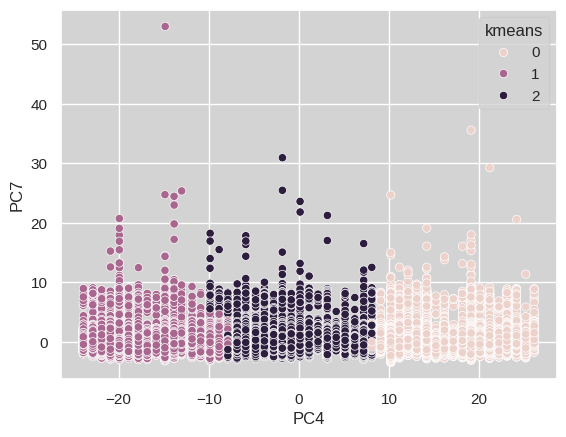

In [136]:
# Use a different visualization method that supports larger datasets
sns.scatterplot(data=pca_df, x="PC4", y="PC7", hue="kmeans")

<Axes: xlabel='PC4', ylabel='PC9'>

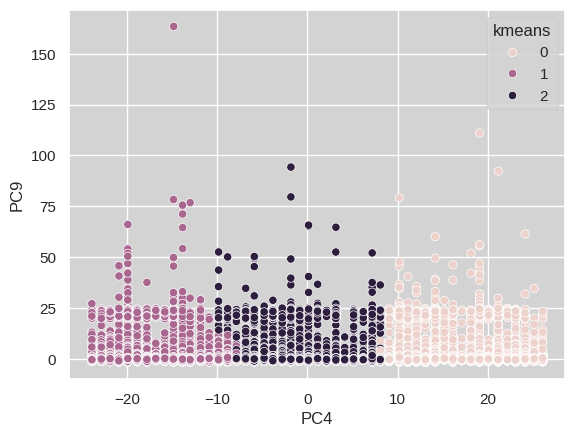

In [137]:
# Use a different visualization method that supports larger datasets
sns.scatterplot(data=pca_df, x="PC4", y="PC9", hue="kmeans")

<Axes: xlabel='PC9', ylabel='PC11'>

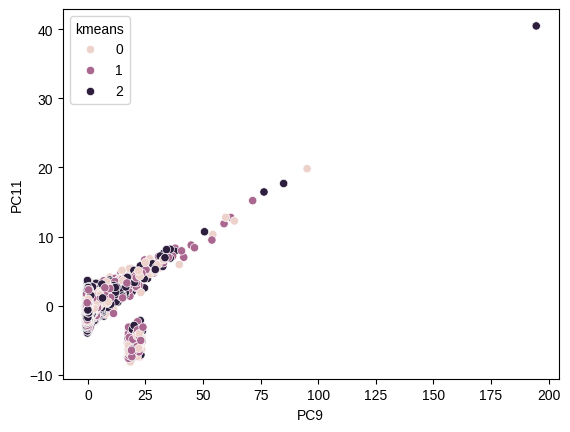

In [ ]:
# Use a different visualization method that supports larger datasets
sns.scatterplot(data=pca_df, x="PC4", y="PC11", hue="kmeans")

<Axes: xlabel='PC7', ylabel='PC11'>

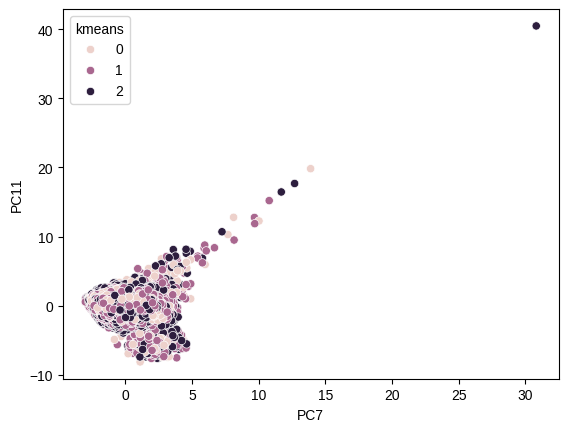

In [ ]:
# Use a different visualization method that supports larger datasets
sns.scatterplot(data=pca_df, x="PC7", y="PC11", hue="kmeans")

<Axes: xlabel='PC11', ylabel='PC9'>

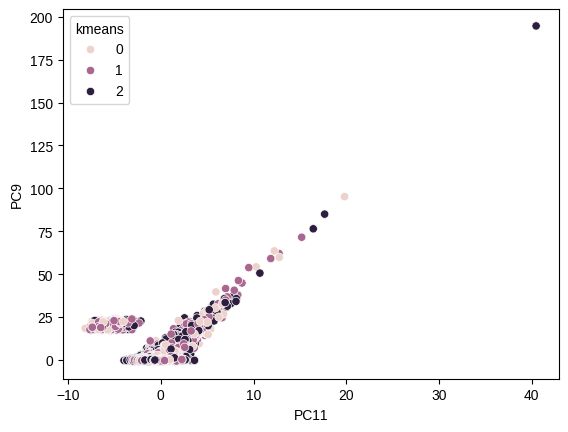

In [ ]:
# Use a different visualization method that supports larger datasets
sns.scatterplot(data=pca_df, x="PC11", y="PC9", hue="kmeans")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score

cluster_labels = kmeans.labels_

# Step 3: Evaluate the Clustering

# Silhouette Score
sil_score = silhouette_score(pca_df, cluster_labels)